# Practice Exercise on Artificial Neural Networks (ANN)

Welcome to the Practice Exercise on Artificial Neural Networks (ANN). In this exercise, we will focus on a classification task where the goal is to predict customer churn. We will work with a dataset to build, train, and evaluate ANN model. This practice will allow you to apply your understanding of neural networks to achieve the best performance.

---

## Dataset Overview

### **Dataset Name:** Telco Customer Churn

### **Description:**  
The dataset contains customer data from a telecommunications company and is used to predict customer churn. Churn refers to customers who stopped using the company's service within the last month. Each row represents a customer, and the dataset includes information about customer demographics, account information, and the services they have signed up for.

### **Features:**
The dataset contains the following columns:

- `customerID`: Unique identifier for the customer.
- `gender`: Gender of the customer (Male, Female).
- `SeniorCitizen`: Whether the customer is a senior citizen (1: Yes, 0: No).
- `Partner`: Whether the customer has a partner (Yes, No).
- `Dependents`: Whether the customer has dependents (Yes, No).
- `tenure`: Number of months the customer has stayed with the company.
- `PhoneService`: Whether the customer has phone service (Yes, No).
- `MultipleLines`: Whether the customer has multiple lines (Yes, No, No phone service).
- `InternetService`: Customer’s internet service provider (DSL, Fiber optic, No).
- `OnlineSecurity`: Whether the customer has online security (Yes, No, No internet service).
- `OnlineBackup`: Whether the customer has online backup (Yes, No, No internet service).
- `DeviceProtection`: Whether the customer has device protection (Yes, No, No internet service).
- `TechSupport`: Whether the customer has tech support (Yes, No, No internet service).
- `StreamingTV`: Whether the customer has streaming TV service (Yes, No, No internet service).
- `StreamingMovies`: Whether the customer has streaming movies service (Yes, No, No internet service).
- `Contract`: The contract term of the customer (Month-to-month, One year, Two year).
- `PaperlessBilling`: Whether the customer has paperless billing (Yes, No).
- `PaymentMethod`: The payment method used by the customer (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)).
- `MonthlyCharges`: The amount charged to the customer monthly.
- `TotalCharges`: The total amount charged to the customer.
- `Churn`: Whether the customer churned (Yes, No).

### **Target Variable:**
- `Churn`: The variable that indicates whether a customer has churned or not.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Telco_Customer_Churn.csv')

## Exploratory Data Analysis (EDA)

* **Inspect the dataset**: The first step is to load the dataset and examine its structure. You will look at the first few rows to ensure it has been correctly loaded and check for basic formatting issues.

* **Dataset structure**: Understand the structure of the dataset, including the number of rows, columns, and data types of each feature. This helps to identify categorical and numerical features and assess the need for data cleaning.

* **Summary statistics**: Generate summary statistics to better understand the distribution of numerical features. This includes measures like mean, median, standard deviation, minimum, and maximum values.

* **Check for missing values**: Identify any missing values in the dataset, as they can influence model performance.

* **Distribution of features**: Plot the distributions of numerical features to identify skewness, outliers, or unusual patterns.

* **Categorical feature analysis**: For categorical variables, count the frequency of each category.

* **Correlation matrix**: Generate a correlation matrix to understand relationships between numerical features.

* **Outlier detection**: Detect and visualize outliers, which can distort the training process. Outliers can be identified using box plots.

And add more as needed!


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.shape

(7043, 21)

In [7]:
for col in df.columns:
  print(col , ' ' ,df[col].unique(),'\n')
  print(col , ' sum: ' ,df[col].value_counts())
  print('___________________ \n')

customerID   ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] 

customerID  sum:  customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64
___________________ 

gender   ['Female' 'Male'] 

gender  sum:  gender
Male      3555
Female    3488
Name: count, dtype: int64
___________________ 

SeniorCitizen   [0 1] 

SeniorCitizen  sum:  SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
___________________ 

Partner   ['Yes' 'No'] 

Partner  sum:  Partner
No     3641
Yes    3402
Name: count, dtype: int64
___________________ 

Dependents   ['No' 'Yes'] 

Dependents  sum:  Dependents
No     4933
Yes    2110
Name: count, dtype: int64
___________________ 

tenure   [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 5

In [8]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [9]:
df.duplicated().sum()

0

## Data Preprocessing

* **Handling missing values**: If there are any missing values identified during EDA, you must decide how to handle them. Common strategies include removing rows or columns with missing values, or imputing them using methods like the mean, median, or a constant value.

* **Encoding categorical variables**: For machine learning models, categorical variables often need to be converted into numerical representations. Common techniques include:
   - **One-hot encoding**: Converts categorical variables into a series of binary columns.
   - **Label encoding**: Assigns a unique integer to each category.
   
* **Scaling and normalization**: Features often need to be scaled so that all of them contribute equally to the model. Two common techniques include:
   - **Standardization (Z-score scaling)**: Centers the data around a mean of 0 and standard deviation of 1. This is suitable for algorithms that assume normally distributed data, such as neural networks.
   - **Min-Max scaling (Normalization)**: Scales the data to a range (usually between 0 and 1). This technique is useful when the algorithm requires a bounded input range, such as in some neural networks.

* **Feature engineering**: In this step, new features can be created from the existing data to enhance the model’s predictive power. This may include combining features, applying mathematical transformations, or encoding domain-specific information.

* **Handling imbalanced data** (if applicable): If the dataset has imbalanced classes, it may be necessary to apply techniques such as:
   - **Oversampling** the minority class.
   - **Undersampling** the majority class.

And add more as needed!


In [10]:
# As the 'customerID' column contains a unique value for each row, I decided to drop it.
df.drop(columns='customerID', axis=1, inplace=True)

In [11]:
df.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [12]:
from sklearn.preprocessing import LabelEncoder

lencoder = LabelEncoder()

for cat in df.select_dtypes(include='object').columns:
  df[cat] = lencoder.fit_transform(df[cat])


In [13]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


<Axes: >

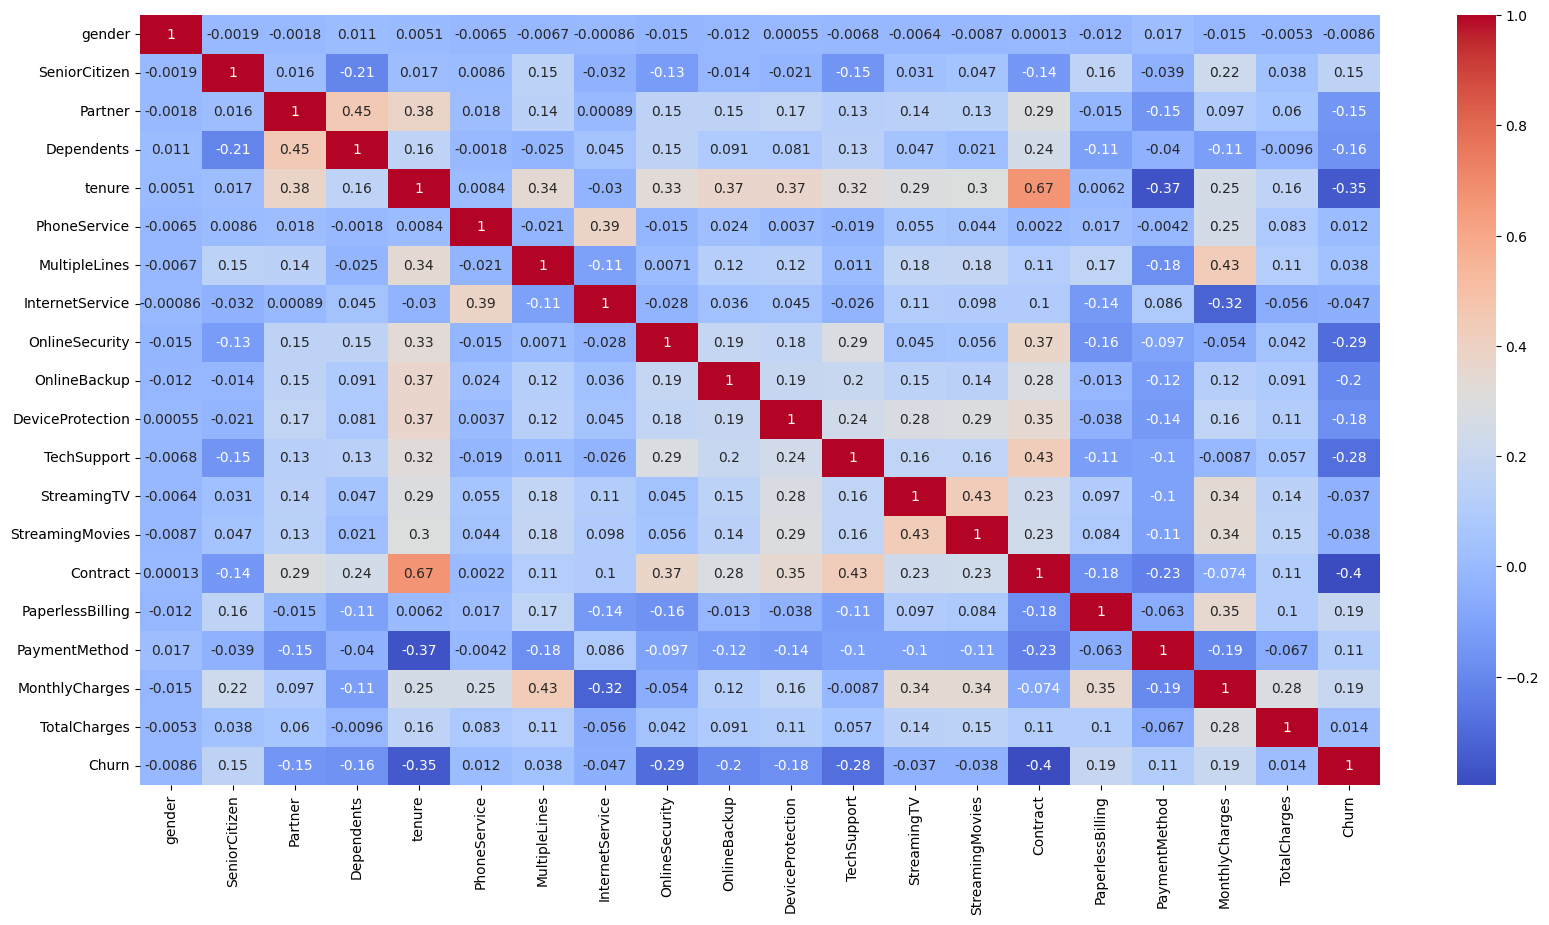

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr() , annot=True, cmap='coolwarm' )

Text(0, 0.5, 'Count')

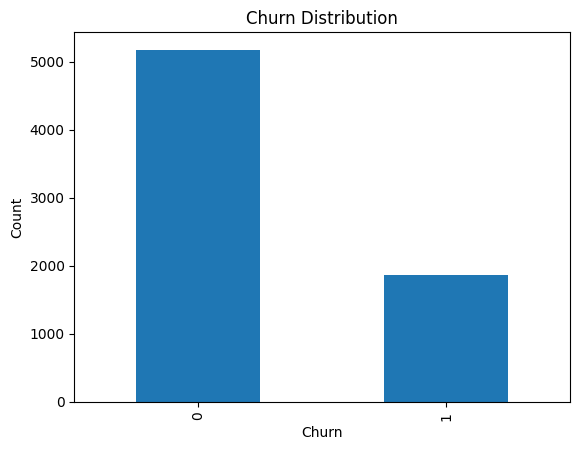

In [15]:
churn_counts = df['Churn'].value_counts()
churn_counts.plot(kind='bar')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')

In [16]:
# The privacy plot indicates that the data is imbalanced. To address this, we will oversample the minority class

from sklearn.utils import resample

majority_class = df[df['Churn']==0]
minority_class = df[df['Churn']==1]

minority_upsampled = resample(minority_class,
                                 replace=True,
                                 n_samples=len(majority_class),
                                 random_state=42)

df = pd.concat([majority_class, minority_upsampled])


Text(0, 0.5, 'Count')

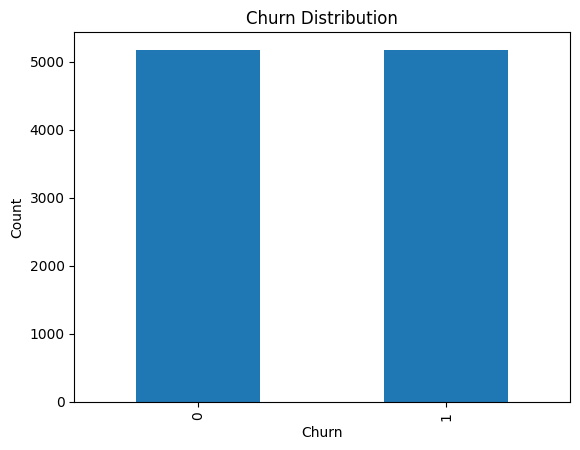

In [17]:
churn_counts = df['Churn'].value_counts()
churn_counts.plot(kind='bar')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [18]:
x = df.drop(columns='Churn', axis=1)
y = df['Churn']

In [19]:
from sklearn.model_selection import train_test_split

x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.33, random_state=42)

In [20]:
x_train.shape

(4645, 19)

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [22]:
model = Sequential([
    Dense(19, activation='relu', input_shape=(19,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metric.

In [23]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Training the Model
Train the ANN model using the training data.

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
es = EarlyStopping(monitor='val_loss', patience=10)

In [26]:
trained_model = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_val,y_val), callbacks=[es])

Epoch 1/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5836 - loss: 4.9035 - val_accuracy: 0.6053 - val_loss: 0.7614
Epoch 2/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6481 - loss: 0.6844 - val_accuracy: 0.7050 - val_loss: 0.6367
Epoch 3/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6442 - loss: 0.8331 - val_accuracy: 0.5800 - val_loss: 1.1241
Epoch 4/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6321 - loss: 0.8234 - val_accuracy: 0.7247 - val_loss: 0.5536
Epoch 5/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6882 - loss: 0.6242 - val_accuracy: 0.5944 - val_loss: 0.8903
Epoch 6/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6898 - loss: 0.6165 - val_accuracy: 0.7281 - val_loss: 0.5377
Epoch 7/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6836 - loss: 0.6477 - val_accuracy: 0.7124 - val_loss: 0.6000
Epoch 8/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7097 - loss: 0.5629 - val_accu

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [27]:
model.evaluate(x_val, y_val)

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7596 - loss: 0.5083


[0.518059492111206, 0.7521852850914001]

## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [28]:
y_pred = model.predict(x_test)

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

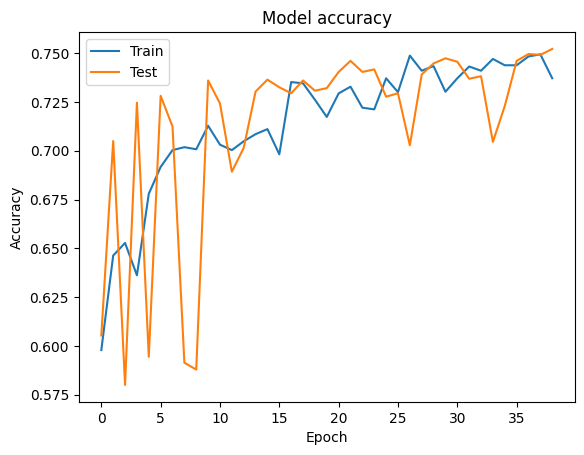

In [29]:

plt.plot(trained_model.history['accuracy'])
plt.plot(trained_model.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()


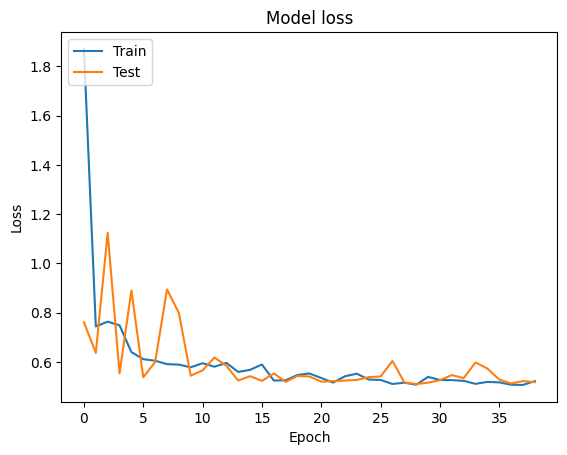

In [30]:

plt.plot(trained_model.history['loss'])
plt.plot(trained_model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

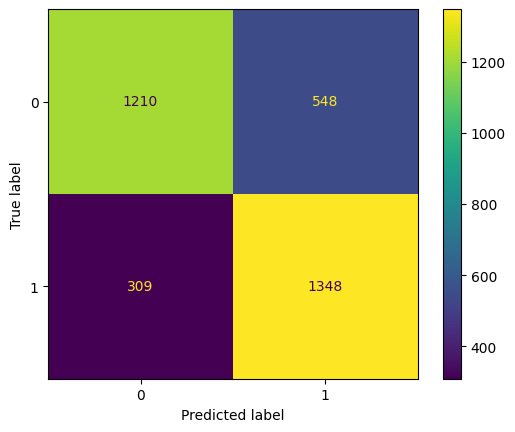

In [33]:
y_pred = (y_pred > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [34]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.69      0.80      0.74      1519
           1       0.81      0.71      0.76      1896

    accuracy                           0.75      3415
   macro avg       0.75      0.75      0.75      3415
weighted avg       0.76      0.75      0.75      3415



## Save the Model
Save the trained model for submission.

In [35]:
model.save("ANNmodel.keras")